In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [2]:
# Load dataset from your local path
df = pd.read_csv(r'C:\Users\MEGA\OneDrive\Desktop\py\Dataset\Housing.csv')


In [3]:
# Preview first few rows and check columns
print(df.head())
print("Columns in dataset:", df.columns.tolist())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Columns in dataset: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 

In [4]:
# Select relevant columns
features = ['area', 'bedrooms', 'bathrooms']
target = 'price'

# Drop rows with missing values in selected columns
df = df.dropna(subset=features + [target])


In [5]:
# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df[target]


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


MAE: 1265275.67
RMSE: 1658324.60


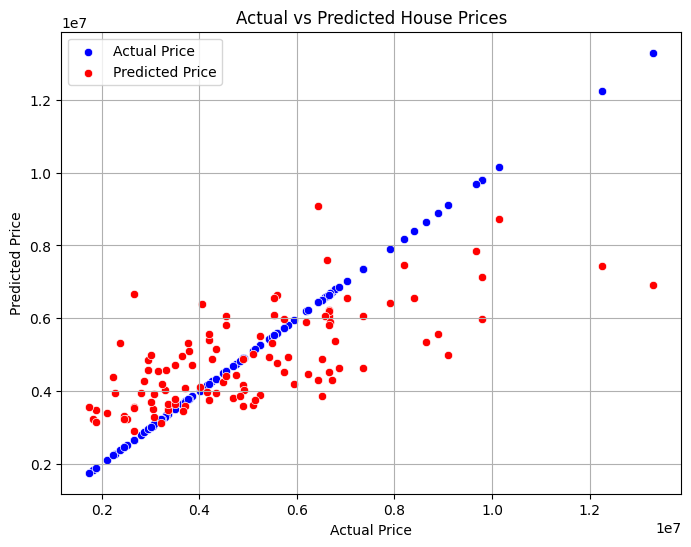

In [9]:
plt.figure(figsize=(8, 6))

# Plot actual prices (blue)
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual Price')

# Plot predicted prices (red)
sns.scatterplot(x=y_test, y=y_pred, color='red', label='Predicted Price')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()
